# Computer Exercise \#07

### Some basic code to get you started

In [47]:
import tensorflow as tf
print('tf: ', tf.__version__)
from tensorflow import keras
print('keras: ', keras.__version__)
import numpy as np
from keras import Input as Input
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib
import matplotlib.pyplot as plt

tf:  2.7.0
keras:  2.7.0


In [2]:
# load the MNIST data set, which already splits into training and test sets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#Reshape the data into a 4d tensor
img_x, img_y = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)

In [3]:
# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Question: ##
What do you get when you type y_train[0]?

In [4]:
y_train[0]

5

In [5]:
print(type(y_train[0]))

<class 'numpy.uint8'>


In [6]:
# one-hot encode the target values
num_classes=10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

## Questions: ##
i. Now what do you get when you type y_train[0]?
> array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

ii. How has the encoding of the target values changed, and why is this change necessary? 
> Since there are now a total of 10 classes, the encoding of the target vaues must be changed to reflect and accomodate that. As such, we now have an array of length 10 with numerical values signifying the similarity to classes: 0-9. This is a form of binary array classification.

In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [8]:
print(type(y_train[0]))

<class 'numpy.ndarray'>


In [9]:
# A simple model
model = Sequential()
model.add(keras.Input(shape=(28,28,)))
model.add(Flatten())
model.add(Dense(32,))
model.add(Dense(10,))

## Questions: ##

__i.__ What is the structure of this network? Be as specific as you can, e.g. number of
layers, number of neurons in each layer, output size, activation functions, etc.
> The model is sequential. There are three layers compossed of: a Flatten layer with no neurons, a Dense layer with 32 neurons, and another Dense layer of 10 neurons.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


__ii.__ Use model.get_weights() to see what the weights are in the network. What are
they, and where do these values come from?

> The weights for each layer are seen below. The weights come from the outputs of each layer.

In [11]:
for layer in model.layers: print(layer.get_config(), layer.get_weights())

{'name': 'flatten', 'trainable': True, 'dtype': 'float32', 'data_format': 'channels_last'} []
{'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 32, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 0.08301381, -0.04629159, -0.07816289, ..., -0.08106566,
         0.04290267, -0.05889638],
       [ 0.01480237,  0.01083061, -0.0334682 , ..., -0.08214426,
        -0.01700132,  0.00059175],
       [-0.08355888, -0.08400769,  0.01756856, ..., -0.00183865,
        -0.07680662,  0.02014629],
       ...,
       [ 0.00492831,  0.01092333, -0.05581471, ..., -0.04343447,
         0.03548449,  0.03207564],
       [ 0.03952547, -0.07597178,  0.05068462, ...,  0.03901941,
         0.07136188, -0.06218211],
     

In [12]:
num_classes=10
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

## Questions: ##
__i.__ What is the structure of this network? Be as specific as you can, e.g. number of layers, number of neurons in each layer, output size, activation functions, etc.
> The network is sequential. There are 7 layers excluding the input layer. the number of neurons are: 32, 4, 64, 4, 1(or 0), 1000, and 10. The activation functions and other specifics can be seen in In[13] below.



In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1000)             

In [14]:
for layer in model.layers: print(layer.get_config(), "\n")

{'name': 'conv2d', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': (5, 5), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} 

{'name': 'max_pooling2d', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'} 

{'name': 'conv2d_1', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': (5, 5), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed'

In [15]:
# Compile model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam',
              metrics=['accuracy'])

__ii.__ How many parameters need to be learned?
> 1,087,106 parameters.

__iii.__ How would you modify this code so that the outputs of first max-pooling layer are 14 × 14, which is half the size of the input image?
> I would change the kernel size of the first 2-dimensional convolution layer to a 1×1 kernel.

In [16]:
num_classes=10
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        64        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 1000)             

In [18]:
num_classes=10
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [19]:
# Compile model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam',
              metrics=['accuracy'])

## Question ##
There is nothing that prevents us from using a cost function such as the least squares error with the softmax activation function. Why is the cross-entropy loss function preferred?
>Cross entropy doesn’t slow down like least squares error does it also learns faster with larger errors.

In [20]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
                     verbose=1, validation_data=(x_test,y_test), callbacks=None) 

Epoch 1/20
469/469 [==============================] - 67s 142ms/step - loss: 0.1815 - accuracy: 0.9451 - val_loss: 0.0744 - val_accuracy: 0.9772
Epoch 2/20
469/469 [==============================] - 66s 140ms/step - loss: 0.0671 - accuracy: 0.9789 - val_loss: 0.0677 - val_accuracy: 0.9787
Epoch 3/20
469/469 [==============================] - 68s 146ms/step - loss: 0.0494 - accuracy: 0.9840 - val_loss: 0.0623 - val_accuracy: 0.9803
Epoch 4/20
469/469 [==============================] - 64s 137ms/step - loss: 0.0376 - accuracy: 0.9878 - val_loss: 0.0571 - val_accuracy: 0.9823
Epoch 5/20
469/469 [==============================] - 58s 125ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0515 - val_accuracy: 0.9850
Epoch 6/20
469/469 [==============================] - 59s 125ms/step - loss: 0.0240 - accuracy: 0.9919 - val_loss: 0.0639 - val_accuracy: 0.9804
Epoch 7/20
469/469 [==============================] - 60s 129ms/step - loss: 0.0205 - accuracy: 0.9927 - val_loss: 0.0531 - val_ac

## Assignment ##
A simple classifier that may be used for handwritten character recognition is __logistic regression__. In order to see what improvements can be made using a neural network, the first thing we will do is see how well logistic regression works.


__i.__ Design a logistic regression classifier using Keras, and train it on the MNIST traing set.

In [21]:
#DON'T LOOK AT THIS ONE!

# load the MNIST data set, which already splits into training and test sets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#Reshape the data into a 4d tensor
img_x, img_y = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)

print(x_train.shape)

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# one-hot encode the target values
num_classes=10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Flatten())
model.add(Dense(10, input_shape=(img_x,img_y,1), activation='sigmoid'))




(60000, 28, 28, 1)


In [22]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test,y_test), callbacks=None)
#history = model.fit(x_train, y_train, batch_size=128, epochs = 20, verbose=1, validation_data=(x_test, y_test)) 
score = model.evaluate(X_test, Y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.predict(X_test[:10])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])


Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3876 - accuracy: 0.2182 - val_loss: 0.3104 - val_accuracy: 0.4202
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2921 - accuracy: 0.5337 - val_loss: 0.2726 - val_accuracy: 0.6320
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2610 - accuracy: 0.6695 - val_loss: 0.2464 - val_accuracy: 0.7137
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2384 - accuracy: 0.7286 - val_loss: 0.2266 - val_accuracy: 0.7575
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2212 - accuracy: 0.7596 - val_loss: 0.2113 - val_accuracy: 0.7821
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2077 - accuracy: 0.7798 - val_loss: 0.1991 - val_accuracy: 0.7997
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1969 - accuracy: 0.7934 - val_loss: 0.1893 - val_accuracy: 0.8105
Epoch 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


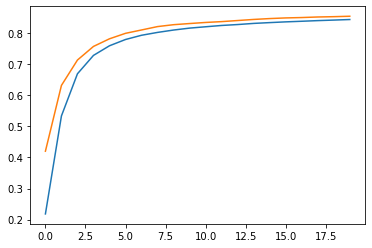

In [24]:
print(model.summary())
#performance on the test set
#predict first 4 images in the test set
model.predict(x_test[:10])

score = model.evaluate(X_test, Y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.predict(X_test[:10])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [146]:
#LOGISTIC REGRESSOR

batch_size = 128
nb_classes = 10
nb_epoch = 20
input_dim = 784 #28*28

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

#model = build_logistic_model(input_dim, nb_classes)


model = Sequential()
model.add(Dense(10, input_dim = input_dim, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))




60000 train samples
10000 test samples
Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_147 (Dense)           (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 1s 3ms/step - loss: 1.2631 - accuracy: 0.7123 - val_loss: 0.8056 - val_accuracy: 0.8382
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.7103 - accuracy: 0.8429 - val_loss: 0.6060 - val_accuracy: 0.8622
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5836 - accuracy: 0.8607 - val_loss: 0.5256 - val_accuracy: 0.8754
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5230 - accuracy: 0.8691 - val_loss: 0.

__ii.__ Find the performance of the classifier on the test set.
> As seen below, the Test loss is 33.6% and the Test accuracy is 90.7%.

Test loss: 0.33722081780433655
Test accuracy: 0.9077000021934509


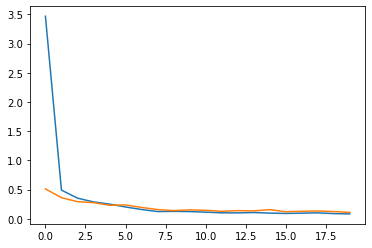

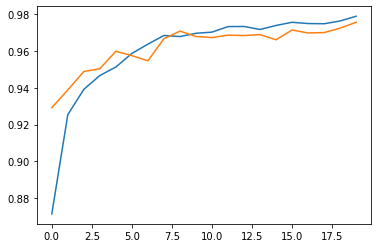

In [148]:
score = model.evaluate(X_test, Y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [27]:
Y_train[0]
y_train[0]

5

## Assignment ##
__i.__ Build a __one-hidden-layer__ and a __two-hidden-layer__ MLP, and train it on the MNIST training set and evaluate its performance on the test set.
>DONE

__ii.__ Experiment with different numbers of neurons in the hidden layers, and see what kind of performance you are able to get.
>DONE

In [130]:
# ONE-HIDDEN-LAYER CLASSIFIER
# load the MNIST data set, which already splits into training and test sets.
from keras.utils import np_utils

batch_size = 128
nb_classes = 10
nb_epoch = 20
input_dim = 784 #28*28
num_classes = 10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Flatten the images
x_train = x_train.reshape(x_train.shape[0], input_dim)
x_test = x_test.reshape(x_test.shape[0], input_dim)

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)


#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
#INPUT LAYER
# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
#model.add(Dense(512, activation='relu',input_shape=(784,)))
#model.add(Dropout(0.2))

#model.add(Input(shape=(28,28,1)))


#model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))

#HIDDEN LAYER
model.add(Dense(32, activation='relu'))

#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(32, activation='sigmoid', input_shape=(img_x,img_y,1)))
#model.add(Flatten())
#model.add(Dense(1000, activation='relu'))

#OUTPUT LAYER
model.add(Dense(10, input_dim = input_dim, activation='softmax'))

model.summary()

# Compile model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_107 (Dense)           (None, 512)               401920    
                                                                 
 dense_108 (Dense)           (None, 10)                5130      
                                                                 
 dense_109 (Dense)           (None, 10)                110       
                                                                 
Total params: 407,160
Trainable params: 407,160
Non-trainable params: 0
_________________________________________________________________


In [132]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test,y_test), callbacks=None)
#history = model.fit(x_train, y_train, batch_size=128, epochs = 20, verbose=1, validation_data=(x_test, y_test)) 

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 2.1178 - accuracy: 0.3523 - val_loss: 1.9798 - val_accuracy: 0.4621
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8930 - accuracy: 0.5082 - val_loss: 1.8049 - val_accuracy: 0.5033
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 1.7325 - accuracy: 0.5038 - val_loss: 1.6588 - val_accuracy: 0.4960
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 1.5967 - accuracy: 0.5023 - val_loss: 1.5353 - val_accuracy: 0.4956
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 1.4823 - accuracy: 0.5049 - val_loss: 1.4331 - val_accuracy: 0.4985
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 1.3884 - accuracy: 0.5070 - val_loss: 1.3508 - val_accuracy: 0.5032
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 1.3108 - accuracy: 0.5100 - val_loss: 1.2821 - val_accuracy: 0.5013
Epoch 

Test loss: 0.9658647179603577
Test accuracy: 0.5296000242233276


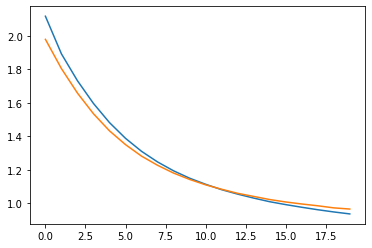

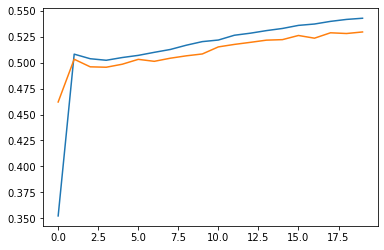

In [134]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

__iii.__ Compare this classifier to the one using logistic regression.
> This classifier fares worse than the logistic regression classifier. For the One-hidden-layer classifier, Test loss = 96.59% and Test accuracy = 52.96%. Meanwhile, the logistic regressor had a Test loss = 33.72% and a Test accuracy = 90.77%.


In [144]:
#TWO-HIDDEN-LAYER NETWORK

from keras.utils import np_utils

batch_size = 128
nb_classes = 10
nb_epoch = 20
input_dim = 784 #28*28
num_classes = 10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images
x_train = x_train.reshape(x_train.shape[0], input_dim)
x_test = x_test.reshape(x_test.shape[0], input_dim)

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()

model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))

#model.add(Dense(units=32, activation='sigmoid', input_shape=(img_x,img_y,1)))
model.add(Dense(512,activation='relu'))
#model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
#model.add(Dense(512,activation='relu'))

model.add(Dense(10,activation='softmax'))
#model.add(Dense(units=num_classes, activation='softmax'))
#model.add(Flatten())
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(num_classes, activation='softmax'))

print(model.summary())


# Compile model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam',
              metrics=['accuracy'])

hist = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test,y_test), callbacks=None)

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 512)               401920    
                                                                 
 dropout_53 (Dropout)        (None, 512)               0         
                                                                 
 dense_145 (Dense)           (None, 512)               262656    
                                                                 
 dense_146 (Dense)           (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 3.4694 - accuracy: 0.8716 - val_loss: 0.5113 - val_accuracy: 0.9292
Epoch 2/20
469/469 [===========

Test loss: 0.10950376093387604
Test accuracy: 0.9754999876022339


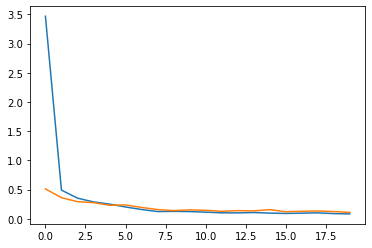

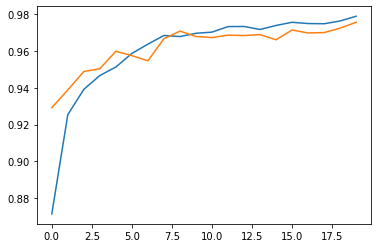

In [145]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

__iii.(CONTINUED)__ Compare this classifier to the one using logistic regression.
> Unlike the previous one-hidden-layer classifier, the Two-Hidden-Layer Classifier, performs much better than the logistic regression classifier. For the Two-Hidden-Layer classifier, Test loss = 10.95% and Test accuracy: 97.55%. Meanwhile, the logistic regressor had a Test loss = 33.60% and a Test accuracy = 90.76%. So the loss is smaller and the accuracy is greater than it was with the logistic classifier.


## Assignment ##
Since there are ten classes to recognize in the handwritten digit classification problem,
suppose that you design a symmetric MLP with 10 hidden layers, each with 10 neurons.
You program this network as follows:

    model = Sequential()
    model.add(keras.Input(shape=(28,28,)))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    
However, when you compile this MLP you find that there is an error. Fix this error,
and any others that you may find, so that it implements a 10 hidden layer MLP with 10
neurons in each layer.

__i.__ What is the accuracy of your classifier? Does it perform as well as you would expect?
How many parameters does this network need to learn?

>The accuracy of the classifier is 95.42%. Given that there are only 10 neurons in each layer, it actually performs better than I expected. However, this may be due to the number of layers. The network needs to learn 4,090 parameters. 

In [32]:
# load the MNIST data set, which already splits into training and test sets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#Reshape the data into a 4d tensor
img_x, img_y = 28, 28

image_size = img_x * img_y

x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)

print(x_train.shape)

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# one-hot encode the target values
num_classes=10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(keras.Input(shape=(28,28,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))

model.add(Flatten())
#model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


# Compile model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam',
              metrics=['accuracy'])

hist = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test,y_test), callbacks=None)

(60000, 28, 28, 1)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 28, 10)            290       
                                                                 
 dense_13 (Dense)            (None, 28, 10)            110       
                                                                 
 dense_14 (Dense)            (None, 28, 10)            110       
                                                                 
 dense_15 (Dense)            (None, 28, 10)            110       
                                                                 
 dense_16 (Dense)            (None, 28, 10)            110       
                                                                 
 dense_17 (Dense)            (None, 28, 10)            110       
                                                                 
 dense_18 (Dense)            (None,

Test loss: 0.15113097429275513
Test accuracy: 0.954200029373169


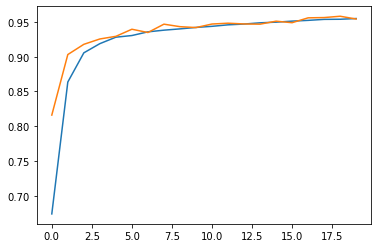

In [33]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

#print(model.predict(x_test[:10]))

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

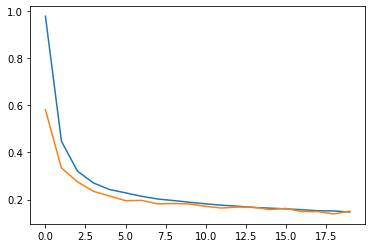

In [34]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

__ii.__ Your network most likely does not perform as well as you would like, so increase
the number of neurons in each layer from 10 to 32. If you get any errors when you
compile this network, find the error and explain what is wrong. If this error has any
effect on your design in part (i), go back and fix it, and train that network again.

In [35]:
# load the MNIST data set, which already splits into training and test sets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#Reshape the data into a 4d tensor
img_x, img_y = 28, 28

image_size = img_x * img_y

x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)

print(x_train.shape)

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# one-hot encode the target values
num_classes=10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(keras.Input(shape=(28,28,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Flatten())
#model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


# Compile model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam',
              metrics=['accuracy'])

hist = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test,y_test), callbacks=None)

(60000, 28, 28, 1)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 28, 32)            928       
                                                                 
 dense_24 (Dense)            (None, 28, 32)            1056      
                                                                 
 dense_25 (Dense)            (None, 28, 32)            1056      
                                                                 
 dense_26 (Dense)            (None, 28, 32)            1056      
                                                                 
 dense_27 (Dense)            (None, 28, 32)            1056      
                                                                 
 dense_28 (Dense)            (None, 28, 32)            1056      
                                                                 
 dense_29 (Dense)            (None,

__iii.__ How well does this network perform and how many parameters need to be learned?
> There are 19,402 parameters to be learned and has a test accuracy of 96.5% and a loss of 11.9%.

Test loss: 0.1197638064622879
Test accuracy: 0.9650999903678894


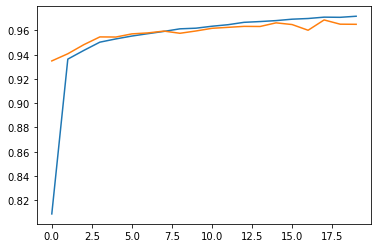

In [36]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

#print(model.predict(x_test[:10]))

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])



## Assignment ##
Instead of a multilayer perception, consider using a convolutional neural network for your digit recognition system.

Using a number of different CNN structures, and experimenting with options such as dropout, normalization, and one or more dense layers, determine the most efficient structure for
achieving a recognizer with recognition rates close to 99%. Keep in mind that you would like a structure as simple as possible (in terms of the number of layers and the number of parameters to learn) that achieves your design goals. The deeper the network, the longer it will take to perform a recognition task. The larger the number of parameters, the higher the chances of
overfitting, the more difficult it may be to train, and the more computational requirements will be needed for classification.

In [37]:

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Input(shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))


model.summary()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 1600)              0         
                                              

In [38]:
batch_size = 128
epochs = 15

# Compile model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 32s 74ms/step - loss: 0.3758 - accuracy: 0.8859 - val_loss: 0.0786 - val_accuracy: 0.9778
Epoch 2/15
422/422 [==============================] - 37s 88ms/step - loss: 0.1134 - accuracy: 0.9653 - val_loss: 0.0578 - val_accuracy: 0.9842
Epoch 3/15
422/422 [==============================] - 38s 89ms/step - loss: 0.0853 - accuracy: 0.9733 - val_loss: 0.0502 - val_accuracy: 0.9867
Epoch 4/15
422/422 [==============================] - 36s 85ms/step - loss: 0.0712 - accuracy: 0.9784 - val_loss: 0.0402 - val_accuracy: 0.9895
Epoch 5/15
422/422 [==============================] - 32s 75ms/step - loss: 0.0648 - accuracy: 0.9801 - val_loss: 0.0408 - val_accuracy: 0.9893
Epoch 6/15
422/422 [==============================] - 32s 76ms/step - loss: 0.0569 - accuracy: 0.9823 - val_loss: 0.0388 - val_accuracy: 0.9892
Epoch 7/15
422/422 [==============================] - 32s 76ms/step - loss: 0.0542 - accuracy: 0.9832 - val_loss: 0.0359 - val_accuracy:

In [39]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02522376738488674
Test accuracy: 0.9921000003814697


## Questions ##
(1) What is the effect of the batch size on training time and on the accuracy of the model?
> A arger batch size leads to: slower training loss decrease, higher minimum validation loss, less time training time needed per epoch, and greater number of epochs needed to to converge to the minimum validation loss. It should be noted that a batch size that is too large will actually lead to poor generalization.

(2) What is a dense layer? Are one or more dense layers necessary?
>Dense layer is the regular deeply connected neural network layer and performs the operation: $ y = φ(w^T\cdot x + b) $. One or more dense layers are necessary as your output layer and the final layers in a FCC before output should be a dense layer.

(3) What is batch normalization and is it mportant? Does it have any effect in your training algorithm?
>Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This stabilizes the learning process and dramatically reduces the number of training epochs required to train deep networks.

(4) What is dropout, and is it necessary for your designs?
>The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Also helps reduce the amount of time learning takes.

### Loading the Cifar-10 data set

## Assignment ##
For this part of the exercise, you are to go through the same design process as for the MNIST data set to design an image classifier that has the best performance you are able to produce, with the most efficient structure.

In [54]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
#def unpickle(file):
#    import cPickle
#    with open(file, 'rb') as fo:
#        dict = cPickle.load(fo)
#    return dict

#cifar10 = unpickle('cifar-10-python.tar.gz')

from tensorflow.keras.datasets import cifar10
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#img_x, img_y = 28, 28
#x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
#x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)

In [69]:

batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch

num_classes = 10 #
epochs = 100 # repeat 100 times

class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


# Print figure with 10 random images from each

#fig = plt.figure(figsize=(8,3))
#for i in range(num_classes):
#    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
#    idx = np.where(y_train[:]==i)[0]
#    features_idx = x_train[idx,::]
#    img_num = np.random.randint(features_idx.shape[0])
#    im = np.transpose(features_idx[img_num,::],(1,2,0))
#    ax.set_title(class_names[i])
#    plt.imshow(im)
#plt.show()



# Convert and pre-processing

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

#Adapted from Keras Cheat Sheet

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_24 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_25 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 15, 15, 32)        0         
                                                     

In [57]:
hist = model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 172s 110ms/step - loss: 1.3574 - accuracy: 0.5102
Epoch 2/15
1563/1563 [==============================] - 185s 118ms/step - loss: 1.1013 - accuracy: 0.6101
Epoch 3/15
1563/1563 [==============================] - 171s 109ms/step - loss: 0.9688 - accuracy: 0.6561
Epoch 4/15
1563/1563 [==============================] - 172s 110ms/step - loss: 0.8850 - accuracy: 0.6877
Epoch 5/15
1563/1563 [==============================] - 173s 110ms/step - loss: 0.8273 - accuracy: 0.7126
Epoch 6/15
1563/1563 [==============================] - 170s 109ms/step - loss: 0.7900 - accuracy: 0.7249
Epoch 7/15
1563/1563 [==============================] - 173s 111ms/step - loss: 0.7497 - accuracy: 0.7362
Epoch 8/15
1563/1563 [==============================] - 174s 111ms/step - loss: 0.7227 - accuracy: 0.7438
Epoch 9/15
1563/1563 [==============================] - 174s 111ms/step - loss: 0.6900 - accuracy: 0.7591
Epoch 10/15
1563/1563 [=======================

In [58]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.7419756650924683
Test accuracy: 0.7512999773025513


In [72]:
from keras.layers import Activation,Conv2D,MaxPooling2D,Flatten
batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch

num_classes = 10 #
epochs = 100 # repeat 100 times

class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

# Print figure with 10 random images from each

#fig = plt.figure(figsize=(8,3))
#for i in range(num_classes):
#    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
#    idx = np.where(y_train[:]==i)[0]
#    features_idx = x_train[idx,::]
#    img_num = np.random.randint(features_idx.shape[0])
#    im = np.transpose(features_idx[img_num,::],(1,2,0))
#    ax.set_title(class_names[i])
#    plt.imshow(im)
#plt.show()



# Convert and pre-processing
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255
x_train.shape
x_test.shape

#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')


#y_train = np_utils.to_categorical(y_train, num_classes)
#y_test = np_utils.to_categorical(y_test, num_classes)

#adapted from keras cheat sheet

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32,32,3]))
model.add(Conv2D(filters=32, kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2,padding='valid'))
model.add(Flatten())

model.add(Dropout(0.6,noise_shape=None,seed=None))

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

model.summary()

model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=15, verbose=1, validation_data=(x_test,y_test), callbacks=None)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_45 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_47 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                

Test loss: 0.6570707559585571
Test accuracy: 0.7817000150680542


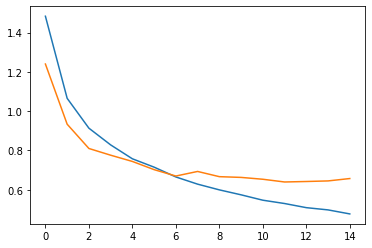

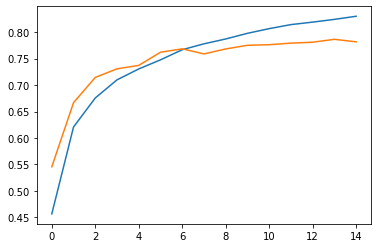

In [75]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])


In [149]:
from keras.layers import Activation,Conv2D,MaxPooling2D,Flatten, BatchNormalization
batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch

num_classes = 10 #
epochs = 100 # repeat 100 times

class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

# Print figure with 10 random images from each

#fig = plt.figure(figsize=(8,3))
#for i in range(num_classes):
#    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
#    idx = np.where(y_train[:]==i)[0]
#    features_idx = x_train[idx,::]
#    img_num = np.random.randint(features_idx.shape[0])
#    im = np.transpose(features_idx[img_num,::],(1,2,0))
#    ax.set_title(class_names[i])
#    plt.imshow(im)
#plt.show()



# Convert and pre-processing
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255
x_train.shape
x_test.shape

#adapted from keras cheat sheet

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32,32,3]))
model.add(Conv2D(filters=32, kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2,padding='valid'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.5,noise_shape=None,seed=None))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

# Train model

model.summary()

#hist = model.fit(x_train,y_train,epochs=15)
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=15, verbose=1, validation_data=(x_test,y_test), callbacks=None)

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_53 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_54 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_55 (Conv2D)          (None, 16, 16, 64)      

Test loss: 0.6548572778701782
Test accuracy: 0.7940000295639038


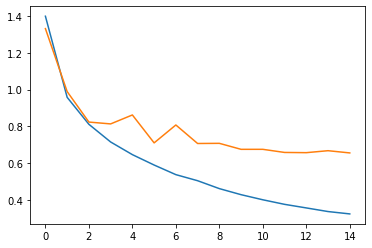

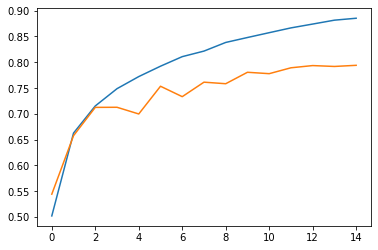

In [151]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])


Discuss your design and compare it to your previous digit recognition systems.
> For my final cifar-10 CNN, I have designed a CNN that achieves a Test Loss of 65.49% and a Test accuracy of 79.40%. This is a marked improvement in comparison to my first cifar-10 CNN, which has a Test Loss of 74.19% and a Test accuracy of 75.13%. There are 10 hidden layers including dropout and normalization layers. As with all my previous classifiers, it is sequential and the number of neurons and parameters can be observed in the summary. This CNN is not dissimilar to my previous classifiers used on the MNIST classification, with the exception that I made more use of zero-padding and alterred the strides of some of the layers. This CNN does not achieve the same performance measures on the Cifar-10 data as the previous digit recognition systems clasifiers did on the MNIST dataset. However, although both datasets are composed of images, it is harder to classify the objects that could look a number of different ways than handwritten digits. The CNN takes just under an hour to train with 15 epochs.